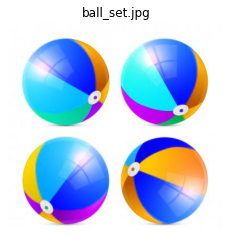

In [1]:
# Import all necessary libs and initial setup
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift, estimate_bandwidth

# Initial read for sample image
img = cv2.imread('ball_set.jpg')
plt.imshow(img)
plt.title('ball_set.jpg')
plt.axis('off')
plt.show()

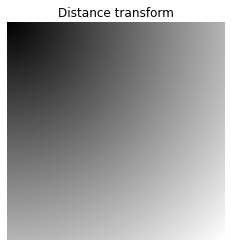

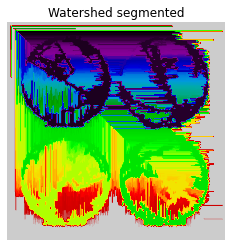

In [2]:
# Question 1

def watershed_seg(img):
    # convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # calculate distance transform of image
    distance = ndi.distance_transform_edt(gray)
    
    # generate watershed markers
    coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=gray)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers = ndi.label(mask)[0]
    
    # perform watershed
    labels = watershed(-distance, markers, mask=gray)
    
    return distance, labels
    
distance, labels = watershed_seg(img)

plt.imshow(distance, 'gray')
plt.title('Distance transform')
plt.axis('off')
plt.savefig('q1_distances.jpg')
plt.show()

plt.imshow(labels, plt.cm.nipy_spectral)
plt.title('Watershed segmented')
plt.axis('off')
plt.savefig('q1_ws.jpg')
plt.show()

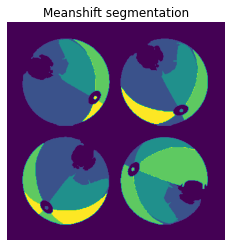

In [3]:
# Question 2

def meanshift_seg(img):
    # extract and flatten RGB channels
    rgb = np.reshape(img, (-1,3))

    # classification
    bandwidth = estimate_bandwidth(rgb, quantile=0.3, n_samples=500)
    
    # perform clustering
    labels = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(rgb)
    segmented_img = np.reshape(labels, img.shape[:2])
    
    return labels, segmented_img
    
labels, segmented_img = meanshift_seg(img)

plt.imshow(segmented_img)
plt.title('Meanshift segmentation')
plt.axis('off')
plt.savefig('q2.jpg')
plt.show()

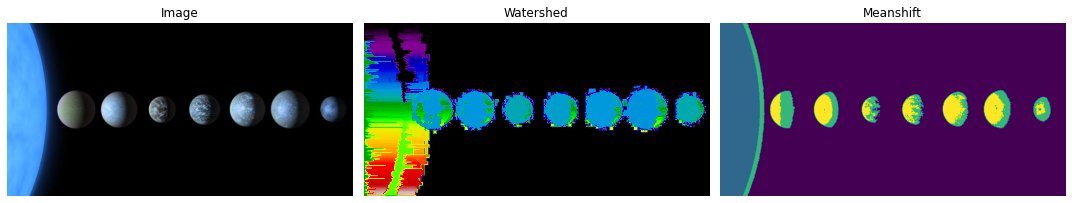

In [4]:
# Question 3

# apply both segmentations to 'planet.jpg'
img = cv2.imread('planets.jpg')
distance, ws_labels = watershed_seg(img)
ms_labels, segmented_img = meanshift_seg(img)

# plot results as per template
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title('Image')
ax[1].imshow(ws_labels, plt.cm.nipy_spectral)
ax[1].set_title('Watershed')
ax[2].imshow(segmented_img)
ax[2].set_title('Meanshift')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.savefig('q3.jpg')
plt.show()